In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [46]:
def extract_info_all(filepath, metric):
	"""
	for multi-class experiment csv
	"""
	organ_names = ["bowel_bag", "bladder", "rectum", "hip"]
	df = pd.read_csv(filepath)
	best_epoch = df["best_epoch"].max() - 1  #best_epoch counting starts from 1
	best_row = df.loc[df["epoch"]==best_epoch]
	values = {}
	for organ_name in organ_names:
		values[organ_name] = best_row[f"{metric}_{organ_name}"].tolist()[0]
	return values


def extract_info(filepath, metric, organ_name):
	df = pd.read_csv(filepath)
	best_epoch = df["best_epoch"].max() - 1  #best_epoch counting starts from 1
	best_row = df.loc[df["epoch"]==best_epoch]
	values = best_row[f"{metric}_{organ_name}"].tolist()[0]
	return values

In [53]:
metric = "precision"
experiment_info = {'all_class': '../runs/all-classes_27082021_172742',
					'bowel_bag': '../runs/binary-bowel_bag_30082021_155606',
					'hip': '../runs/binary-hip_30082021_170839',
					'bladder': '../runs/binary-bladder_27082021_173452',
					'rectum': "../runs/binary-rectum_29082021_211829"
}

data = {}
for experiment_name, experiment_folder in experiment_info.items():
	filepaths = glob.glob(experiment_folder + "/*/*/epoch_results/*.csv")

	for filepath in filepaths:
		if experiment_name == "all_class":
			values_all = extract_info_all(filepath, metric)
			for organ_name, value in values_all.items():
				colname = "multiclass_" + organ_name
				val_list = data.get(colname, [])
				val_list.append(value)
				data[colname] = val_list
		else:
			value = extract_info(filepath, metric, experiment_name)
			val_list = data.get(experiment_name, [])
			val_list.append(value)
			data[experiment_name] = val_list

print(data)


{'multiclass_bowel_bag': [0.8081481481481481, 0.8066666666666668, 0.8330769230769233, 0.8107692307692306, 0.7240740740740741, 0.7296296296296297, 0.8044444444444444, 0.7640740740740741, 0.7370370370370373, 0.8051851851851851], 'multiclass_bladder': [0.9203703703703704, 0.8733333333333334, 0.8503846153846155, 0.837307692307692, 0.8737037037037035, 0.925555555555556, 0.904074074074074, 0.8881481481481481, 0.8503703703703704, 0.8537037037037037], 'multiclass_rectum': [0.7662962962962963, 0.7514814814814814, 0.7799999999999999, 0.7484615384615384, 0.7377777777777778, 0.7433333333333332, 0.6781481481481481, 0.7170370370370369, 0.7337037037037036, 0.7362962962962962], 'multiclass_hip': [0.8481481481481481, 0.8488888888888888, 0.8511538461538461, 0.8926923076923079, 0.8755555555555558, 0.8566666666666666, 0.8918518518518519, 0.8948148148148148, 0.9092592592592592, 0.8988888888888888], 'bowel_bag': [0.7644776119402986, 0.7267164179104477, 0.7471212121212119, 0.7724242424242421, 0.7536363636363

In [54]:
# not all runs are complete, so impute with None
nruns = [len(val) for _, val in data.items()]
max_runs = max(nruns)
for key, val in data.items():
	if len(val) < max_runs:
		extra_entries = [None for _ in range(max_runs - len(val))]
		data[key] = data[key] + extra_entries
print(data)


{'multiclass_bowel_bag': [0.8081481481481481, 0.8066666666666668, 0.8330769230769233, 0.8107692307692306, 0.7240740740740741, 0.7296296296296297, 0.8044444444444444, 0.7640740740740741, 0.7370370370370373, 0.8051851851851851], 'multiclass_bladder': [0.9203703703703704, 0.8733333333333334, 0.8503846153846155, 0.837307692307692, 0.8737037037037035, 0.925555555555556, 0.904074074074074, 0.8881481481481481, 0.8503703703703704, 0.8537037037037037], 'multiclass_rectum': [0.7662962962962963, 0.7514814814814814, 0.7799999999999999, 0.7484615384615384, 0.7377777777777778, 0.7433333333333332, 0.6781481481481481, 0.7170370370370369, 0.7337037037037036, 0.7362962962962962], 'multiclass_hip': [0.8481481481481481, 0.8488888888888888, 0.8511538461538461, 0.8926923076923079, 0.8755555555555558, 0.8566666666666666, 0.8918518518518519, 0.8948148148148148, 0.9092592592592592, 0.8988888888888888], 'bowel_bag': [0.7644776119402986, 0.7267164179104477, 0.7471212121212119, 0.7724242424242421, 0.7536363636363

<AxesSubplot:>

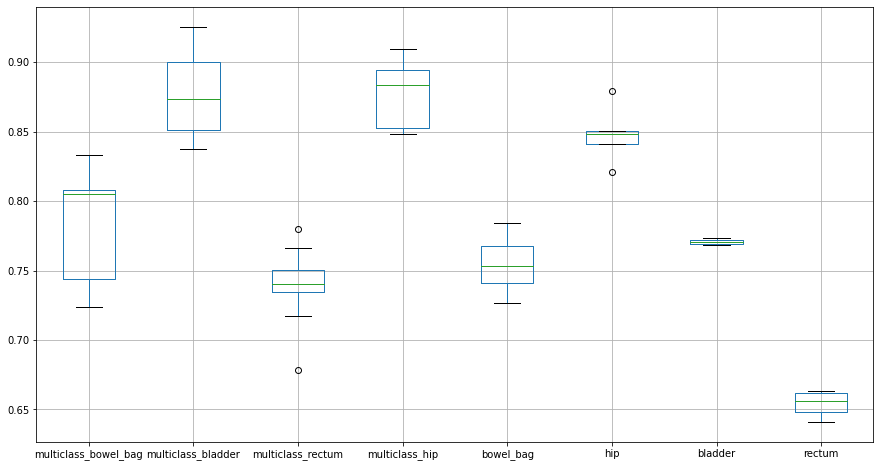

In [55]:
dice_info = pd.DataFrame.from_dict(data)
dice_info.boxplot(figsize=(15,8))